In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\Social_Network_Ads.csv")[["Age", "EstimatedSalary", "Purchased"]]

In [71]:
df.sample(5)

,Age,EstimatedSalary,Purchased
287,48,138000,1
22,48,41000,1
385,56,60000,1
155,31,15000,0
242,50,88000,1


**Train Test Split**

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased', axis =1),
                                                df['Purchased'],
                                                test_size=0.3,
                                                random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

**StandardScaler**

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [91]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [92]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [93]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [94]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**Effect of Scaling**

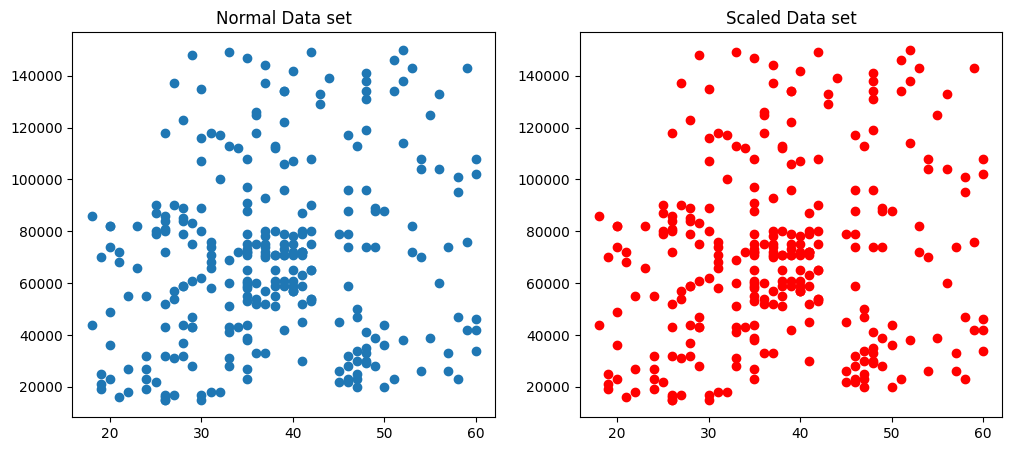

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.scatter(X_train['Age'],X_train['EstimatedSalary'], color = 'red')
ax1.set_title("Normal Data set")
ax2.set_title("Scaled Data set")
plt.show()

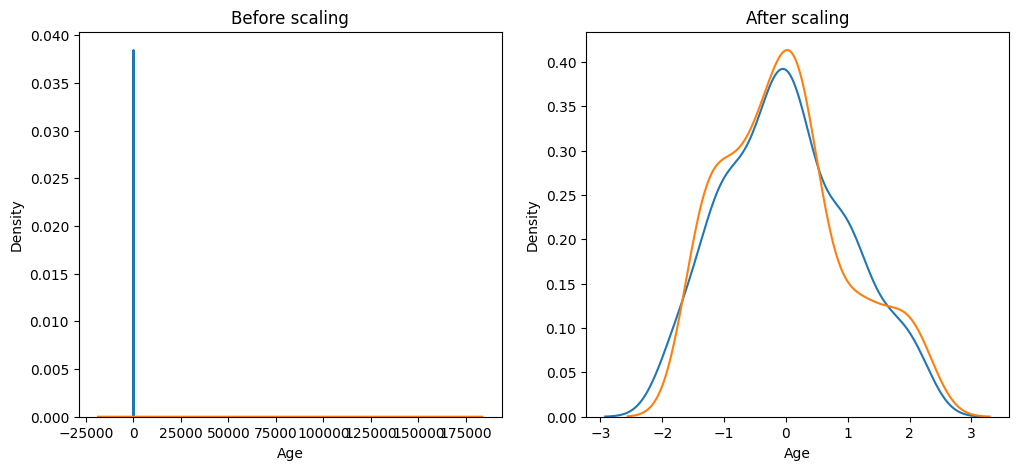

In [96]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'],ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


**Comparision of Distributions**

<Axes: title={'center': ' Age Distribution After scaling'}, xlabel='Age', ylabel='Density'>

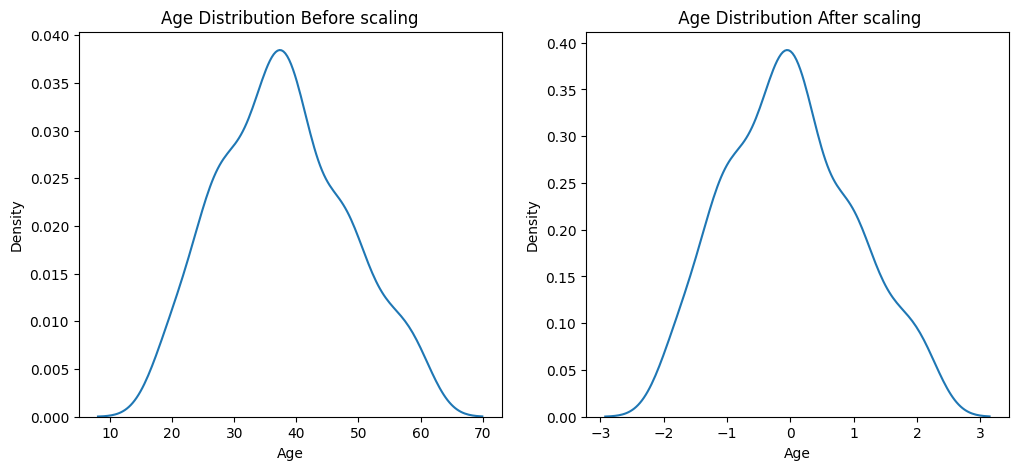

In [97]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Age Distribution Before scaling')
sns.kdeplot(X_train['Age'],ax= ax1)


ax2.set_title(' Age Distribution After scaling')
sns.kdeplot(X_train_scaled['Age'], ax= ax2)

<Axes: title={'center': ' Age Distribution After scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

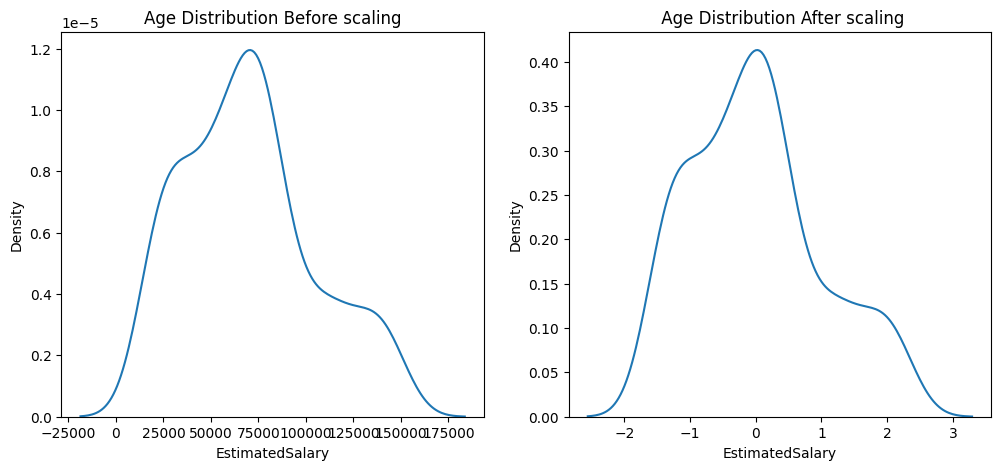

In [98]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Age Distribution Before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax= ax1)


ax2.set_title(' Age Distribution After scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= ax2)

**Scaling is important?**

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [101]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [102]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
print('Actual', accuracy_score(y_test,y_pred))
print('Scaled', accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [105]:

from sklearn.tree import DecisionTreeClassifier

In [106]:

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [107]:

dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [108]:

y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [109]:

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [110]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Effect of Outlier**

In [114]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)

df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


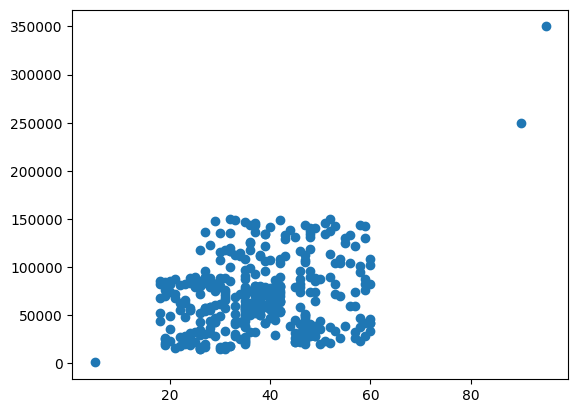

In [115]:

plt.scatter(df['Age'], df['EstimatedSalary'])

In [116]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [118]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

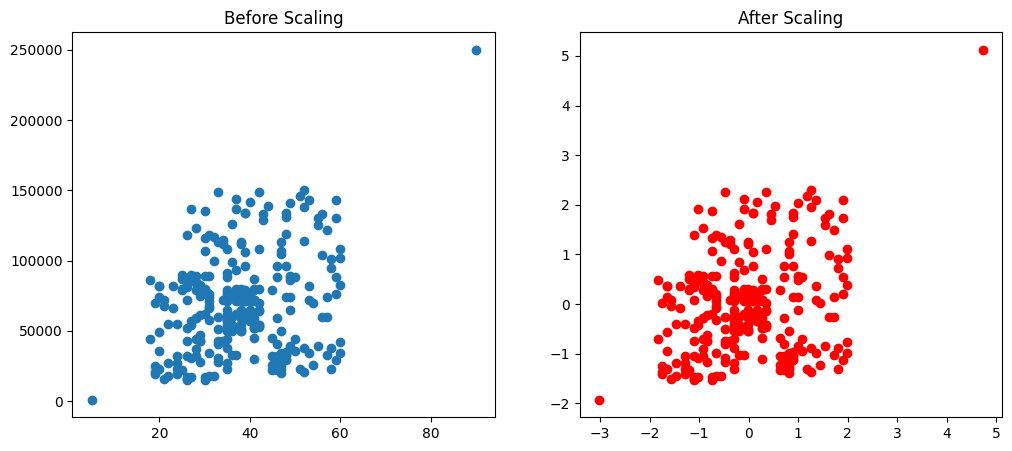

In [119]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()